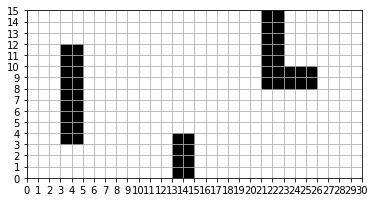

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as patches

class CustomizedShape():
    def __init__(self):
        # Define the shape of a robot.
        shape_description_robot = [
            (1., 2., mpath.Path.MOVETO),
            (1., 1., mpath.Path.LINETO),
            (2., 1., mpath.Path.LINETO),
            (2., -1., mpath.Path.LINETO),
            (1., -1., mpath.Path.LINETO),
            (1., -2., mpath.Path.LINETO),
            (-1., -2., mpath.Path.LINETO),
            (-1., -1., mpath.Path.LINETO),
            (-2., -1., mpath.Path.LINETO),
            (-2., 1., mpath.Path.LINETO),
            (-1., 1., mpath.Path.LINETO),
            (-1., 2., mpath.Path.LINETO),
            (0., 0., mpath.Path.CLOSEPOLY),
        ]
        u, v, codes = zip(*shape_description_robot)
        self.marker_robot = mpath.Path(np.asarray((u, v)).T, codes)

        
        # Define the shape of a target.
        shape_description_target = [
            (np.cos(72*3.25*np.pi/180), np.sin(72*3.25*np.pi/180), mpath.Path.MOVETO),
            (np.cos(72*1.25*np.pi/180), np.sin(72*1.25*np.pi/180), mpath.Path.LINETO),
            (np.cos(72*4.25*np.pi/180), np.sin(72*4.25*np.pi/180), mpath.Path.LINETO),
            (np.cos(72*2.25*np.pi/180), np.sin(72*2.25*np.pi/180), mpath.Path.LINETO),
            (np.cos(72*0.25*np.pi/180), np.sin(72*0.25*np.pi/180), mpath.Path.LINETO),
            (np.cos(72*3.25*np.pi/180), np.sin(72*3.25*np.pi/180), mpath.Path.LINETO),
            (0., 0., mpath.Path.CLOSEPOLY),
        ]
        u, v, codes = zip(*shape_description_target)
        self.marker_target = mpath.Path(np.asarray((u, v)).T, codes)
        
        
        # Define the walls.
        
        # sub_block of the whole wall -> sub_wall.
        # pos_sub_wall = [[(xmin, xmax), (ymin, ymax)],
        #                 [(xmin, xmax), (ymin, ymax)], ...]
        pos_sub_wall = []
        pos_sub_wall.append([(3, 4), (3, 11)])
        pos_sub_wall.append([(13, 14), (0, 3)])
        pos_sub_wall.append([(21, 25), (8, 9)])
        pos_sub_wall.append([(21, 22), (10, 14)])
        pos_sub_wall = np.array(pos_sub_wall)
        
        # Construct the positions of the wall.
        pos_wall = []
        for index_sub_wall in np.arange(pos_sub_wall.ndim + 1):
            for index_x in np.arange(pos_sub_wall[index_sub_wall][0][0], pos_sub_wall[index_sub_wall][0][1] + 1):
                for index_y in np.arange(pos_sub_wall[index_sub_wall][1][0], pos_sub_wall[index_sub_wall][1][1] + 1):
                    pos_wall.append([index_x, index_y])
                    
        pos_wall = np.array(pos_wall)
            
        # Construct the wall.
        n_walls = pos_wall.shape[0]
        self.walls = np.zeros(n_walls, dtype=[('position', float, 2),
                                        ('shape', patches.Rectangle, 1)])
        for index in np.arange(n_walls):
            self.walls['position'][index] = pos_wall[index]
            self.walls['shape'][index] = patches.Rectangle(self.walls['position'][index], 1., 1., color='k')
            
            
        # Check whether the given position(s) is(are) within the walls.
        
        
            

# data = np.random.rand(8, 8)
# plt.scatter(data[:, 0], data[:, 1], c='0.75', marker=CustomizedShape().marker_robot, s=64)

fig, ax = plt.subplots()
for shape in CustomizedShape().walls['shape']:
    ax.add_patch(shape)
    
ax.grid(True)
ax.set_xlim(0, 30)
ax.set_ylim(0, 15)
x_ticks = np.arange(0, 30 + 1, 1)
y_ticks = np.arange(0, 15 + 1, 1)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_aspect('equal')


plt.show()